<a href="https://colab.research.google.com/github/brandonb1121/lab-3-phase-2-brandonb1121/blob/main/Lab_3_Brandon_Brownell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieval Practice and Learning

What is the most effective way to learn a subject? Many students focus exclusively on the _encoding_ process---that is, how to get the knowledge into memory in the first place. For example, taking notes is an activity for encoding knowledge.

_Retrieval_, on the other hand, is the process of reconstructing that knowledge from memory. [Karpicke and Blunt](http://science.sciencemag.org/content/331/6018/772) (2011) demonstrated that _retrieval_ is more effective for learning than activites designed to promote effective encoding. They conducted an experiment in which subjects had to learn about sea otters by reading a passage. Subjects were randomly assigned to one of two conditions: some were instructed to create a [concept map](https://en.wikipedia.org/wiki/Concept_map) as they read the passage, while others were instructed to practice retrieval (i.e., read the passage, recall as much as they could, read the text again, and recall again). The two main measurements they recorded were:

1. each subject's score on a follow-up learning test one week later
2. each subject's _prediction_ of how well they would do on that test

In this lab, you will analyze data from a _replication_ of Karpicke and Blunt's experiment, conducted by Buttrick _et al_.
- The data file is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/data.csv.
- The codebook (explaining what the variables mean) is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/codebook.csv.

In [1]:
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_memory = pd.read_csv(data_dir + "KarpickeBlunt2011Replication/data.csv")
df_memory.head()

,ID,Age,Gender,Date.P1,Date.P2,Condition,IC.1,IC.2,Comp.1,Comp.2,PR.1,PR.2,MCS.1,Scorer.1,MCS.2,Scorer.2,MCS.avg,R1CS.1,Scorer.1.1,R1CS.2,Scorer.2.1,R1CS.avg,R2CS.1,Scorer.1.2,R2CS.2,Scorer.2.2,R2CS.avg,TS.1,Scorer.1.3,TS.2,Scorer.2.3,TS.avg,Exc.1,Exc.2,Collection
0,KB1,18,Female,11/21/16,11/28/16,Concept,1,1,1,1,1.0,0.80,0.750,NK,0.670,TT,0.7100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NK,0.42,MS,0.39,0,0,1
1,KB2,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.400,NK,0.367,TT,0.3835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.48,MS,0.36,NK,0.42,0,0,1
2,KB3,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.433,NK,0.550,MS,0.4915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,NK,0.08,MS,0.08,0,0,1
3,KB4,19,Female,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.317,NK,0.333,MS,0.3250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.44,MS,0.42,NK,0.43,0,0,1
4,KB5,19,Female,11/22/16,11/29/16,Concept,1,1,1,1,0.0,0.95,0.683,NK,0.717,MS,0.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.26,NK,0.28,MS,0.27,0,0,1


# Question 1

Which group felt like they learned more: the subjects who made concept maps or the ones who practiced retrieval? (Or are they about the same?) Make an appropriate visualization and explain what you see.

_Hint:_ Use the variable `PR.2`, which contains the participants' predictions of how well they would do on a test one week later.

,count,mean,std,min,25%,50%,75%,max
Condition,,,,,,,,
Concept,26.0,0.690385,0.142842,0.4,0.6,0.7,0.775,0.95
Retrieval,17.0,0.576471,0.195350,0.3,0.4,0.6,0.700,0.90


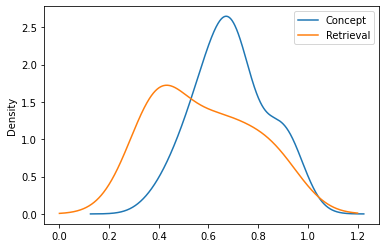

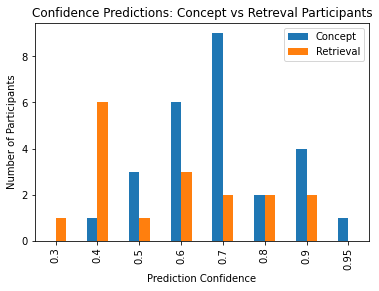

In [2]:
df_memory.groupby("Condition")["PR.2"].plot.density(legend=True)

breakdown = pd.DataFrame(df_memory[['PR.2','Condition']].value_counts())
breakdown['Confidence'] = breakdown.index
breakdown.sort_values('Confidence',inplace=True)
breakdown = breakdown.unstack(level=1)
breakdown.plot.bar(    
    title='Confidence Predictions: Concept vs Retreval Participants',
    xlabel='Prediction Confidence',
    ylabel='Number of Participants').legend(['Concept', 'Retrieval'])

df_memory.groupby("Condition")["PR.2"].describe()

**YOUR EXPLANATION HERE**

Graphed above is a density plot of score predicitons for follow up assesments grouped by conditions. As we can see, those who were assigned a Concept condition tended to predict higher follow up scores for themselves more than those who were assigned a Retrieval condition. 

While the Retrieval curve does have a lower peak, there is a noticable amount of density in the higher scores as well. This could be cause for some suspicion about how the Retrieval group predicts their outcomes. However, the summary statistics provided above reinforce that the Concept group has a higher mean and median.

Overall, we can say the Concept group predicts a higher outcome score on their follow-up assesment in comparison to the Retrieval group.

# Question 2

Which group actually did better on the follow-up learning test one week later? Make an appropriate visualization and explain what you see.

_Hint:_ Don't ask which variable you should use. That is for you to figure out. Read the codebook carefully (consulting the [original paper](http://science.sciencemag.org/content/331/6018/772), if necessary), make an informed decision, and explain your choice.

,count,mean,std,min,25%,50%,75%,max
Condition,,,,,,,,
Concept,26.0,0.468846,0.185220,0.08,0.375,0.47,0.5975,0.8
Retrieval,17.0,0.616471,0.187315,0.34,0.440,0.62,0.7300,1.0


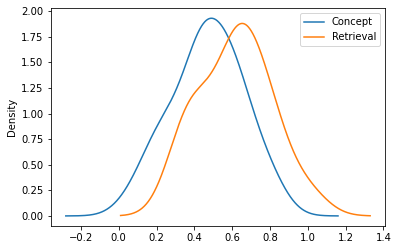

In [3]:
df_memory.groupby("Condition")["TS.avg"].plot.density(legend=True)
df_memory.groupby("Condition")["TS.avg"].describe()

**YOUR EXPLANATION HERE**

After consulting the attached codebook, we have decided to use the Test Score Average variable to determine which group performed better on the follow-up learning test one week later. 

Graphed above is a density plot of average test scores for each group. As opposed to the outcome in question 1, the Retrieval group performed better as a whole compared to the Concept group. With the summary statistics provided as well, we can see that the Retrieval group have higher mean and median follow-up test scores. 

# Question 3

How good were subjects at predicting how well they would do on the follow-up learning test? Calculate a measure of how well subjects predicted their performance and interpret the value in context. (Optionally, you may want to include a visualization as well.)

In [9]:
from altair import *
df_memory = df_memory.rename(columns = {"PR.2":"Prediction", "TS.avg":"Performance"})
df_memory.dropna(subset=["Performance","Prediction"],inplace=True)
Chart(df_memory).mark_circle().encode(
    x = 'Prediction',
    y = 'Performance',
    color = 'Condition')

alt.Chart(...)

Condition
Concept     -0.221538
Retrieval    0.040000
Name: Actual-Pred, dtype: float64

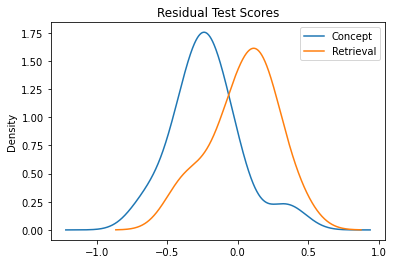

In [10]:
df_memory["Actual-Pred"] = df_memory["Performance"] - df_memory["Prediction"]
df_memory.groupby("Condition")["Actual-Pred"].plot.density(
    title="Residual Test Scores",
    legend=True
)
df_memory.groupby("Condition")["Actual-Pred"].mean()

**YOUR EXPLANATION HERE**

In order to determine how well subjects were at predicting their follow-up test score, we decided to create a new variable that measures predicitve success. The variable is the difference between the subjects actual follow-up score and their predicted score. In this case, a positive residual is interpreted as doing better than predicted.

Attached above is mean residual values for each group, as well as a desnity plot describing the distribution of residual values for each group. From previous questions, we could insinuate that the Retrieval group performed better than they predicted. The plot above helps reinforce that idea by demonstrating that their residuals lied around the 0.05 mark. Additionally, their mean residual score was 0.040, which means they scored 4.0% higher on average than their predicted follow up test score.

On the other hand, those in the Concept group performed worse than their predicted score on average. Given that their residual mean was -0.222, this means they performed 22.2% worse on average than their predicted follow up test score.

Overall, the Retrieval group performed higher than their predicted test scores on average and better predicted their test scores as well. With a residual of 0, this means the actual score was identical to their predicted score. The Retrieval group's mean residual was closer to 0 than the Concept group's, so the Retrieval group was much more successful in predicting their follow-up test scores.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 3 - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partner for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.